In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random
random.seed(1)

# Numerical Integration Investigation

In this example, we will investigate a few different methods of numerical integration.  We will use the following function as our test case:

$$y = \frac{3}{2}(1-x^2)$$

We will integrate this function from $x=0$ to $x=1$.

The exact value of the integral is:

$$\int_0^1 y dx = 1$$

In [2]:
def generator_function(x):
    return 3.0/2.0*(1.0 - x*x)

## Monte Carlo Integration

Another method of numerical integration is the Monte Carlo method.  In this method, we generate a large number of random points in the interval, and evaluate the function at each point.  The integral is then the average of the function values times the width of the interval.  The error in this method is proportional to the width of the interval, so the error decreases as $n$ increases.  The error is also proportional to the second derivative of the function, so the error decreases as the function becomes smoother.

We will consider n values of $n$ from $10^2$ to $10^6$.

In [3]:
max_order = 8
min_order = 2
Iexact = 1.0

norders = max_order - min_order + 1

npts = np.zeros(norders)

enp = np.zeros(norders)
sum2 = np.zeros(norders)
esum2 = np.zeros(norders)

for j in range(min_order,max_order+1):
    npoints = 10**j
    # array to hold number of points
    npts[j-min_order]=npoints

    xlow = 0.0
    xhigh = 1.0
    dx = (xhigh-xlow)/npoints
        
    for i in range(0,int(npoints-1)): # Note that for the trapezoidal rule, we need to evaluate the function at the endpoints of each interval,
                                      # so we only go to n-1
        xval = xlow + np.random.random()*(xhigh-xlow)
        sum2[j-min_order] += generator_function(xval)*dx
    
    esum2[j-min_order] += 2.0*np.abs(sum2[j-min_order]-Iexact)
    
    print("Integral = %.15f +/- %.15f for npoints = %d" %(sum2[j-min_order],esum2[j-min_order],npoints))
    print("Error = %f" %np.abs(esum2[j-min_order]))
    
    

Integral = 1.093002325524909 +/- 0.186004651049817 for npoints = 100
Error = 0.186005
Integral = 1.008379101611775 +/- 0.016758203223550 for npoints = 1000
Error = 0.016758
Integral = 0.999973527370335 +/- 0.000052945259329 for npoints = 10000
Error = 0.000053
Integral = 0.998782779394580 +/- 0.002434441210839 for npoints = 100000
Error = 0.002434
Integral = 1.000467039009603 +/- 0.000934078019207 for npoints = 1000000
Error = 0.000934
Integral = 0.999806137877955 +/- 0.000387724244090 for npoints = 10000000
Error = 0.000388
Integral = 0.999934382974112 +/- 0.000131234051775 for npoints = 100000000
Error = 0.000131


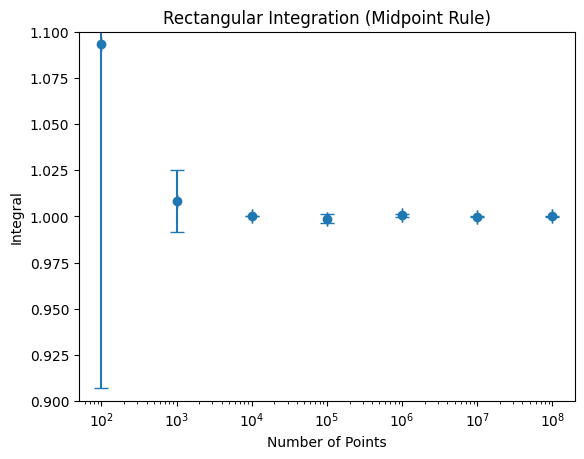

In [4]:
plt.errorbar(npts,sum2,xerr=enp,yerr=esum2,fmt='o',capsize=5)
plt.xscale("log")
plt.xlabel("Number of Points")
plt.ylabel("Integral")
plt.title("Rectangular Integration (Midpoint Rule)")
plt.ylim(0.9,1.1)
plt.show()

Slope = -0.525246


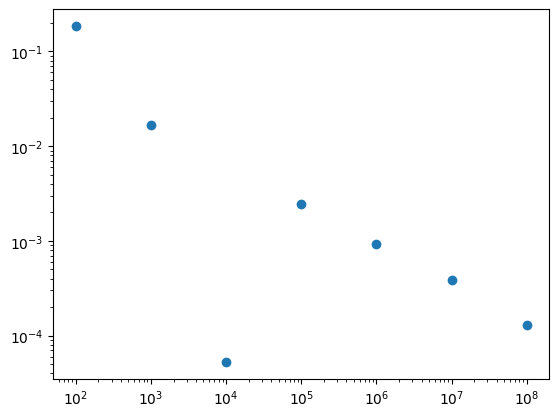

In [5]:
plt.plot(npts,esum2,'o')
plt.xscale("log")
plt.yscale("log")

slope = (np.log(esum2[max_order-min_order])-np.log(esum2[0]))/(np.log(npts[max_order-min_order])-np.log(npts[0]))
print("Slope = %f" %slope)